In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [0]:
pd.set_option('display.notebook_repr_html', False)
 
%matplotlib inline
plt.style.use('seaborn-white')

In [0]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

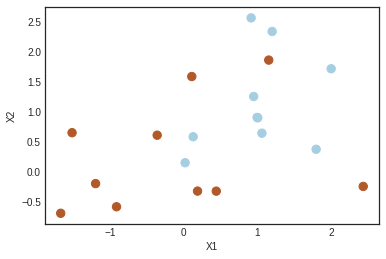

In [7]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

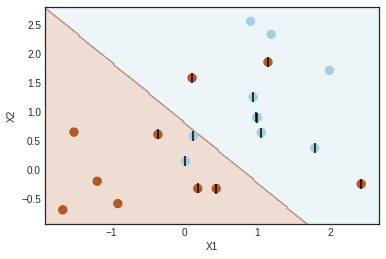

Number of support vectors:  13


In [8]:
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

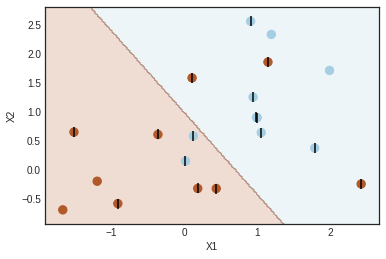

Number of support vectors:  16


In [9]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [11]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00082028, 0.00047297, 0.00048499, 0.00061307, 0.00051851,
        0.00049717, 0.00066178]),
 'mean_score_time': array([0.00059369, 0.00034418, 0.00033774, 0.00043721, 0.00034499,
        0.00033042, 0.00034585]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

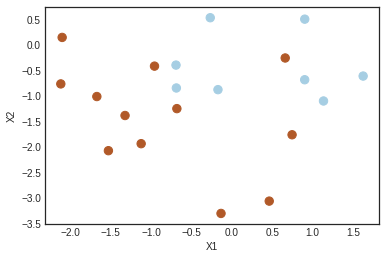

In [12]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [13]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

    -1   1
-1   2   6
 1   0  12

In [14]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

    -1   1
-1   2   6
 1   0  12

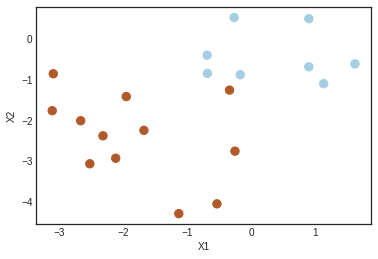

In [15]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [17]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)


SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

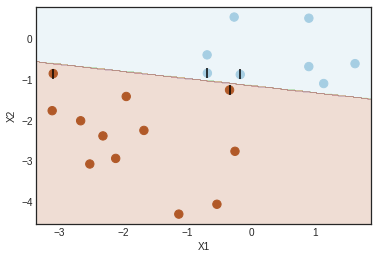

Number of support vectors:  4


In [18]:
plot_svc(svc4, X_test, y_test)

In [19]:
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

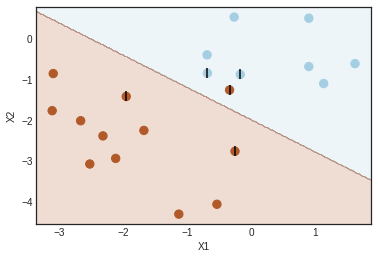

Number of support vectors:  5


In [20]:
plot_svc(svc5, X_test, y_test)

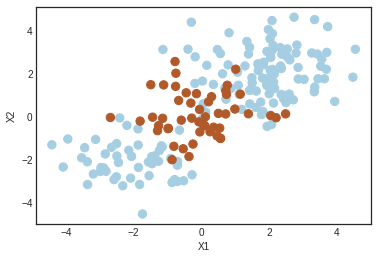

In [21]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [22]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

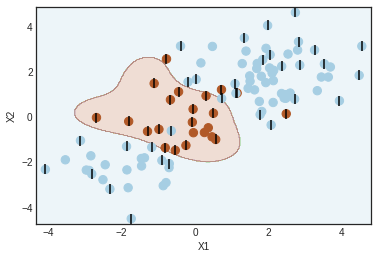

Number of support vectors:  51


In [23]:
plot_svc(svm, X_train, y_train)

In [24]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

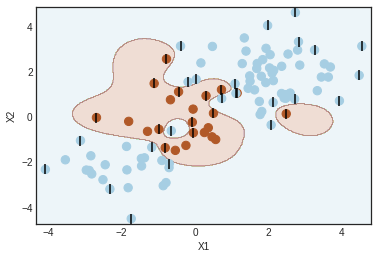

Number of support vectors:  36


In [25]:
plot_svc(svm2, X_train, y_train)

In [27]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00105071, 0.0006387 , 0.00080247, 0.00075588, 0.00074358,
        0.00065656, 0.00067706, 0.00076306, 0.00080507, 0.00083361,
        0.00064006, 0.00069706, 0.00085955, 0.00093606, 0.00094759,
        0.00063066, 0.00075853, 0.00089438, 0.00095603, 0.00098321,
        0.00069995, 0.0007735 , 0.00090995, 0.00100317, 0.00098758]),
 'mean_score_time': array([0.00061853, 0.00037818, 0.00039225, 0.00038877, 0.00036705,
        0.00039182, 0.00037904, 0.00036306, 0.00036635, 0.00035844,
        0.00035293, 0.00037539, 0.00037537, 0.00037274, 0.00040624,
        0.00036304, 0.00042632, 0.00037954, 0.00038025, 0.00037744,
        0.0003691 , 0.00038269, 0.00037842, 0.00041459, 0.00039527]),
 'mean_test_score': array([0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.9 ,
        0.9 , 0.88, 0.86, 0.83, 0.91, 0.87, 0.86, 0.87, 0.87, 0.86, 0.83,
        0.86, 0.88, 0.87]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1,

In [29]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[66,  7],
       [ 6, 21]])

In [31]:
clf.best_estimator_.score(X_test, y_test)

0.87

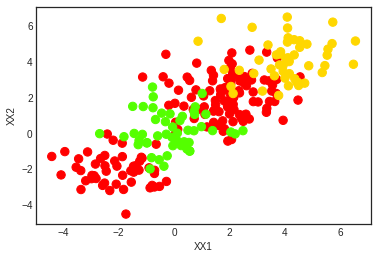

In [32]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [33]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

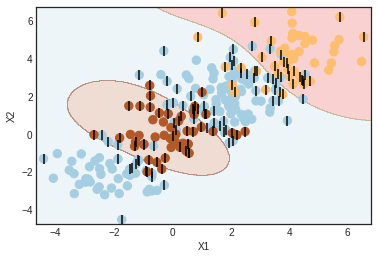

Number of support vectors:  128


In [34]:
plot_svc(svm5, XX, yy)